## Project 2 - Supervised Learning - Gradiant Descent and Classification
### Due: 4/2/2021 Frinday 11:59 PM

### Task
This project is broadly breakinto two parts: 
1. Gradient Descent Implementation - the task is to implement the gradien descent function to find all possible local mamina and gloabl minimum coordinates. 
2. Wine Quality Classifiaction Implementation - the task is to implement three classifiers, KNN, LDA, and Logistic Regresion, to classify the quality of red wine using a given data `winequality-red.csv`.

### Descriptions & Rules
1. All work must be your own. Any evidence of copying, collaborating, and cheating will result 0. 
2. This project does not require a report. However, all work and results must be discussed - simply answering or stating results is not acceptable. 
3. **The project will not allow any extenstions** - except a case of health and other emergencies. You must submit the project as incompletion if you do not finish on time. 
4. You must submit the **jupyter notebook** file and the **exported HTML** file. 
5. All codes must be excutable - if the code does not work, you will get 0 for that particular code. 

### Gradient Descent Implementation. 

We are going to implement a standard gradient decent optimization function `my_GradDes(x,y,z,theta,learning_rate,iteration)` to find all possible local maxima and global maximum coordinates. 

Data Set: `P2_1.csv` has four features. We have $x=(-4.0,4.0)$ and $y=(-4.0,4.0)$, the true $z$ value is a function of $x$ and $y$, $z=f(x,y)$, and $z_pred$ which is a predicted value of $z$. Below a 3-D plot is povided. 

Requirement:
1. The cost function: $J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h(\theta)^i-y^i))^2$
2. Gradient: $\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}(h(\theta)^i-y^i)).X_j^i$

where $m=$number of observation. 


Task:
1. Test with the learning rate $\eta=[0.01, 0.05, 0.1, 1]$. 


Required Result: For each $\eta$, report
1. Iteration #
2. Did it overshoot?
3. Total number of local minima
4. The coordinates ($x,y$) for all local minima and global mimimum

Points: 
- Code: 25 points
- Test: 5 points
- Answers: 20 points

<IPython.core.display.Javascript object>


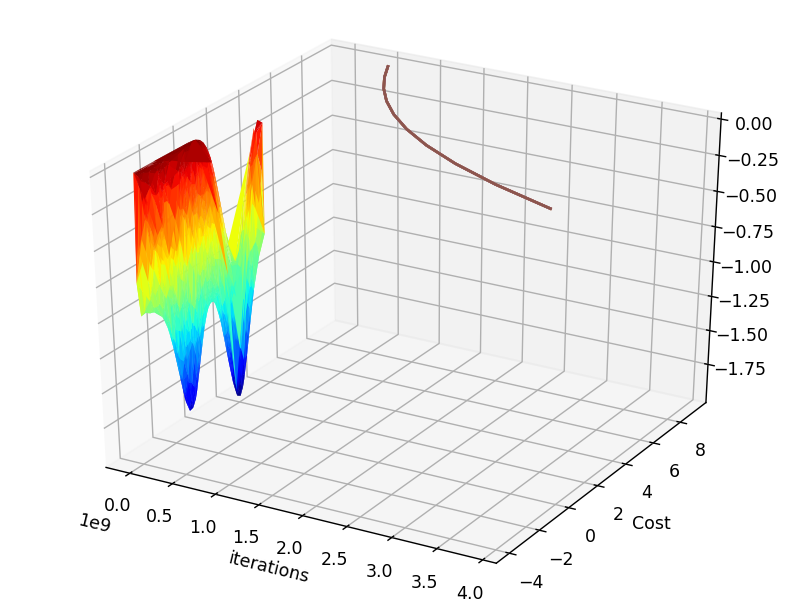

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.model_selection import train_test_split
import random
%matplotlib notebook
df = pd.read_csv('P2_1.csv')

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(df.x, df.y, df.z, cmap=cm.jet, linewidth=0.2)
plt.show()

In [392]:
### Code Starts Here
def my_Gradient(x,y,z,theta,learning_rate,iteration):
    #Let m be the number of observations or the length of X or Y
    m = len(y)
    #init cost list
    cost_list = []
    #init theta list 
    theta_list = [theta]
    for i in range (iteration):
        pred = x.dot(theta)
        
        theta = theta -(1/m)*learning_rate*(x.T.dot((pred-y)))
        theta_list.append(theta)
        #theta_list[i,:] = theta.T
        cost = cost_function(x,y,theta)
        cost_list.append(cost)
        #cost_list[i] = cost_function(x,y,theta)
        
    return theta, cost_list, theta_list
        
#     grad = (1/m)*np.sum(theta - y).dot(x)
#     grad = (1/m)*
#     return grad
    
    

In [393]:
#def cost function
def cost_function(x, y, theta):
    #set m
    m = len(y)
    pred = x.dot(theta)
    cost = (1/2*m)*np.sum(np.square(pred-y))
    return cost

In [403]:
#Test gradient descent
#LR = 0.05, 0.01, .1, 1
#theta = random value of gaussian distirbution
theta = np.random.randn(1499)
theta, past_cost, past_theta = my_Gradient(df.x, df.y, df.z, theta,0.05,10)

In [411]:
past_cost

[3866045081.2593727,
 3118553837.3310223,
 2514771866.4262195,
 2027165303.28583,
 1633466132.0668852,
 1315666042.0555198,
 1059202431.9039645,
 852299876.3571687,
 685437372.7712198,
 550917351.2269661]

In [410]:
plt.title('Cost Function')
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.plot(past_cost, [0,1,2,3,4,5,6,7,8,9])
plt.show()

In [ ]:
#Questions for gradient descent
'''
1 What is theta and how do we know what shape its supposed to be?
What should theta init as?
The equation sin the lecture notes do not have theta variable

2 what do we do with Z in the gradient descent function?
Lecture notes do not include a 3rd dimension

2a What is z? It's not expressed in the above equations

3 How do we include the sum of 1 to M in the gradient descent function

4 is h(theta) our prediction?

5 Is this the correct was to express the partial derivative 

'''

In [3]:
df.head()

,Unnamed: 0,x,y,z,z_pred
0,0,3.325447,-0.869890,-0.048580,-0.063702
1,1,0.199415,-1.064081,-0.865777,-0.883839
2,2,0.623499,1.176377,-0.796616,-0.760264
3,3,0.294015,-0.907471,-0.734876,-0.747532
4,4,-0.613311,-2.226039,-1.179802,-1.155625


Answer the result here:

### Classification - Wine Quality 

In the given data, `winequality-red.csv`,there are 12 features and the target is “quality”. You are going to implement three classifiers to classify the wine quality. 

A. Exploratory Data Analysis: (10 pts)

- a. Find missing value features and impute the value using mean, median, and 0. 
- b. Make histograms and determine which method in A-a is the most appropriate. 
- c. The wine quality is rated from 3 to 8. Categorize the quality to be a binary categorical data as good and bad.

In [4]:
winedf = pd.read_csv('winequality-red.csv')

In [5]:
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,NaN,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,NaN,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,NaN,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Find total number of missing values
winedf.isna().sum()

fixed acidity            19
volatile acidity         32
citric acid             170
residual sugar           38
chlorides                51
free sulfur dioxide      80
total sulfur dioxide     57
density                  58
pH                       34
sulphates                61
alcohol                  22
quality                   0
dtype: int64

In [7]:
#Fill Nans with mean
meanWineDf = winedf.fillna(np.mean(winedf))

In [8]:
meanWineDf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.292169,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.292169,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.292169,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
meanWineDf.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
medianWinedDf = winedf.fillna(np.median(meanWineDf))

In [16]:
medianWinedDf.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
zeroWineDf = winedf.fillna(0)

In [19]:
zeroWineDf.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

B. Implement KNN function, my_KNN, to classify the good and bad wine quality. (10 pts)

In [20]:
def euclidean_distance(x1, x2):
    return np.linalg.norm(x1-x2)

In [99]:
#Define my_knnn class

class my_KNN:
    def __init__(self,k):
        self.k = k
    

        #define function to find k neighbors 
    def k_neighbors(self, test_row, x_train, y_train):
        self.test_row = test_row
        self.x_train = x_train
        self.y_train = y_train
        dist = []
        for i in range(len(x_train)):
            #Calculate distance between row and xtrain
            distance = self.euclidean_distance(test_row, x_train[i])
            #append to distance list
            distance.append((distance, y_train[i]))
        #sort distance list
        dist.sort()
        #return :k neighbors
        return dist[:self.k]
    
    def get_nn(self):
        self.x_train = np.array(self.x_train)
        self.x_test = np.array(self.x_test)
        self.y_train = np.array(self.y_train)
        self.y_test = np.arry(self.y_test)
        neighbors = []
        
        for i in range(len(self.x_test)):
            neighbors.append(self.k_neighbors(self.X_test[j], x_train, y_train))
            
        return neighbors
    
    #Define a fit method to fit the training data
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
        
    def predict(self, x_test,):
        pred_labels =[self.pred_helper(i) for i in x_test]
        return np.array(pred_labels)
    
    def pred_helper(self, x_test):
        #find distance
        dist = [euclidean_distance(x_test,self.x_train[i]) for i in self.x_train]
        
        #get k_neighbors
        k_indices = k_neighbors(x_test, x_train,y_train)
        kn_labels = [self.y_train[i] for i in k_indices]
        
        #find count
        count = Counter(kn_labels).most_common(1)
        return count[0][0]
        
#     #implement a predict method
#     def predict(self, x_test):
#         self.x_test = x_test
#         pred_labels = []
#         nbrs = []
#         nn = []
#         for i in x_test:
#             #compute distance
#             neighbors = k_neighbors(i,i)
#             nbrs.append(neighbors)
#             #get nearest neighbors
#             temp_nn = self.get_nn()
#             nn.append(temp_nn)
            
#             #count most common class label
#             vote = Counter(nn).most_common(1)
#         return vote[0][0]

In [ ]:
#Testing the code from class My_Knn

In [262]:
def k_neighbors( test_row, x_train, y_train, k):
    dist = []
    for i in range(len(x_train)):
        #Calculate distance between row and xtrain
        distance = euclidean_distance(test_row, x_train[i])
        #append to distance list
        dist.append((distance, y_train[i]))
    #sort distance list
    dist.sort()
    #return :k neighbors
    return dist[:k]

In [276]:
def get_nn(x_test, x_train, y_train, y_test,k):
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    neighbors = []
        
    for i in range(len(x_test)):
        neighbors.append(k_neighbors(x_test[i], x_train, y_train,k))
            
    return neighbors

In [255]:
def fit(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

In [295]:
def predict(x_test, x_train, y_train,k):
        pred_labels =[pred_helper(i, x_train,y_train,k) for i in x_test]
        return np.array(pred_labels)

In [296]:
def pred_helper(x_test, x_train, y_train,k):
    #find distance
    dist = [euclidean_distance(x_test,i) for i in x_train]
        
    #get k_neighbors
    k_indices = k_neighbors(x_test, x_train,y_train,k)
    kn_labels = [y_train[i] for i in k_indices]
        
    #find count
    count = Counter(kn_labels).most_common(1)
    return count[0][0]

In [298]:
k_neighbots = k_neighbors(meanX_test_arr, meanX_train_arr, meanY_train_arr, 3)

In [300]:
k_neighbots[0]

(744.8449070569077, array([6], dtype=int64))

In [278]:
neighbors = get_nn(meanX_test_arr, meanX_train_arr, meanY_train_arr, meanY_test_arr,3)

In [280]:
len(neighbors)

480

In [297]:
predict(meanX_test_arr, meanX_train_arr,meanY_train_arr,3)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [301]:
####Below is verison 2 of KNN #####

In [385]:
def knn_get_neighbors(x_train, y_train, x_test, k):
    #iter through x_test 
    for i in x_test:
        labels_list = []
        #store distances between xtest and xtrain
        dist = []
        #store x_train row data in list for index
    
        #iter through x_train
        for j in range(len(x_train)):
            #find euclidean distance
            
            distance= euclidean_distance(x_train[j,:], i)
            #append to dist
            dist.append((x_train[j,:],distance))
        #convert dist list to np array
        #dist= np.array(dist)
        #sort dist array
        #print(dist[0])
        #sort by distance[1]
        dist.sort(key=lambda d: d[1])
        distOut = dist[:k]
        #print('distout', distOut)
        #find labels of distout
        #labels = y[distOut]
    neighbors = []
    for i in range(k):
        neighbors.append(distOut[i][0])
    labels_dict = {}
    for i in range(len(neighbors)):
        response = neighbors[i][-1]
        if response in labels_dict:
            labels_dict[response] +=1
        else:
            labels_dict[response]= 1
    sorted_labels = sorted(labels_dict.items(), key=lambda x: x[1], reverse=True)
    return sorted_labels[0][0]
    
    #return neighbors
#         #find highest cound
#         count = mode(labels)
#         count = count.mode[0]
#         labels_list.append(count)
#     return labels_list
            
        

In [386]:
def knn_predict(x_train, y_train, x_test, k):
    neighbors = knn_get_neighbors(x_train, y_train, x_test, k)
    output = [i[-1] for i in neighbors]
    prediction = max(set(output),key=output.count)
    return prediction

In [387]:
labels3 = knn_get_neighbors(meanX_train_arr, meanY_train_arr, meanX_test_arr, 3)

In [378]:
knn_predict(meanX_train_arr, meanY_train_arr, meanX_test_arr, 3)

9.3

In [388]:
labels3

9.3

In [ ]:
#######Below is a different version of functions for my_knn ######

In [322]:
def get_neighbors(x_train, x_test, k):
    dist = []
    #iter through xtrain
    for train_row in x_train:
        #find euclidean distance for each train row and eachtest
        #print('train_row: ', train_row)
        #print('x_test; ', x_test)
        d = euclidean_distance(x_test, train_row)
        #append to dist list
        dist.append((train_row,d))
        print('trian_row: ', train_row)
        print('dL ', d)
    #sort distance
    dist.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(k):
        neighbors.append(dist[i][0])
        #print('disti: ', dist[i][0])
    return neighbors

In [167]:
def predict(x_train, x_test, k):
    neighbors = get_neighbors(x_train, x_test, k)
    output = [i[-1] for i in neighbors]
    prediction = max(set(output),key=output.count)
    return prediction

In [190]:
def k_nearest_neighbors(x_train, x_test, k):
    pred = []
    for i in x_test:
        output = predict(x_train, i, k)
        pred.append(output)
    return pred

In [172]:
def accuracry(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct+=1
    return correct/float(len(actual)) *100

In [61]:
#Split Data set into X and Y
meanwineX = meanWineDf.iloc[:,:11]
meanwineY = meanWineDf.iloc[:,11:12]

In [62]:
#Train Test Split
meanX_train, meanX_test, meanY_train, meanY_test = train_test_split(meanwineX, meanwineY, stratify=meanwineY, test_size=0.3, random_state=0)

In [63]:
meanX_train.shape, meanX_test.shape, meanY_train.shape, meanY_test.shape

((1119, 11), (480, 11), (1119, 1), (480, 1))

In [122]:
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

In [123]:
dataset[0]

[2.7810836, 2.550537003, 0]

In [160]:
dataset= np.array(dataset)

In [161]:
dataset

array([[ 2.7810836 ,  2.550537  ,  0.        ],
       [ 1.46548937,  2.36212508,  0.        ],
       [ 3.39656169,  4.40029353,  0.        ],
       [ 1.38807019,  1.85022032,  0.        ],
       [ 3.06407232,  3.00530597,  0.        ],
       [ 7.62753121,  2.75926224,  1.        ],
       [ 5.33244125,  2.08862677,  1.        ],
       [ 6.92259672,  1.77106367,  1.        ],
       [ 8.67541865, -0.24206865,  1.        ],
       [ 7.67375647,  3.50856301,  1.        ]])

In [320]:
#Test getneighbors with dataset
get_neighbors(dataset, dataset[0],3)

disti:  [2.7810836 2.550537  0.       ]
disti:  [3.06407232 3.00530597 0.        ]
disti:  [1.46548937 2.36212508 0.        ]


[array([2.7810836, 2.550537 , 0.       ]),
 array([3.06407232, 3.00530597, 0.        ]),
 array([1.46548937, 2.36212508, 0.        ])]

In [165]:
meanX_train_arr = np.array(meanX_train)
meanX_train_arr

array([[ 7.1       ,  0.71      ,  0.29216935, ...,  3.47      ,
         0.55      ,  9.4       ],
       [ 7.2       ,  0.65      ,  0.02      , ...,  3.67      ,
         0.65676203,  9.7       ],
       [ 6.9       ,  0.49      ,  0.1       , ...,  3.42      ,
         0.58      , 10.2       ],
       ...,
       [ 8.4       ,  0.29      ,  0.4       , ...,  3.39      ,
         0.6       , 10.5       ],
       [ 6.2       ,  0.56      ,  0.09      , ...,  3.54      ,
         0.6       , 11.3       ],
       [ 8.7       ,  0.5285067 ,  0.09      , ...,  3.34      ,
         0.86      , 10.6       ]])

In [323]:
#test get neighbors with df
get_neighbors(meanX_train_arr, meanX_test.iloc[[0]],3)

trian_row:  [ 7.1         0.71        0.29216935  1.9         0.08       14.
 35.          0.99673562  3.47        0.55        9.4       ]
dL  19.507084968705755
trian_row:  [7.20000000e+00 6.50000000e-01 2.00000000e-02 2.30000000e+00
 9.40000000e-02 5.00000000e+00 3.10000000e+01 9.96735620e-01
 3.67000000e+00 6.56762029e-01 9.70000000e+00]
dL  14.027745079016386
trian_row:  [ 6.9     0.49    0.1     2.3     0.074  12.     30.      0.9959  3.42
  0.58   10.2   ]
dL  14.491960158998507
trian_row:  [10.7     0.35    0.53    2.6     0.07    5.     16.      0.9972  3.15
  0.65   11.    ]
dL  3.1524199022338384
trian_row:  [ 7.3         0.695       0.29216935  2.5         0.075       3.
 13.          0.998       3.49        0.52        9.2       ]
dL  7.710202092592851
trian_row:  [ 7.5      0.58     0.56     3.1      0.153    5.      14.       0.99476
  3.21     1.03    11.6    ]
dL  6.740102062253954
trian_row:  [ 7.9      0.34     0.36     1.9      0.065    5.      10.       0.99419
  3.

trian_row:  [ 6.4         0.69        0.29216935  1.65        0.055       7.
 12.          0.99162     3.47        0.53       12.9       ]
dL  9.170370910547904
trian_row:  [5.8000e+00 1.0100e+00 6.6000e-01 2.0000e+00 3.9000e-02 1.5000e+01
 8.8000e+01 9.9357e-01 3.6600e+00 6.0000e-01 1.1500e+01]
dL  70.90832215367178
trian_row:  [ 9.       0.785    0.24     1.7      0.078   10.      21.       0.99692
  3.29     0.67    10.     ]
dL  6.071046541610434
trian_row:  [ 6.       0.5      0.04     2.2      0.092   13.      26.       0.99647
  3.46     0.47    10.     ]
dL  12.385500250086793
trian_row:  [7.200e+00 7.300e-01 2.000e-02 2.500e+00 7.600e-02 1.600e+01 4.200e+01
 9.972e-01 3.440e+00 5.200e-01 9.300e+00]
dL  26.50768257015313
trian_row:  [11.8         0.26        0.52        1.8         0.071      15.92363397
 10.          0.99673562  3.2         0.72       10.2       ]
dL  12.788761652036618
trian_row:  [11.8     0.33    0.49    3.4     0.093  54.     80.      1.0002  3.3
  0.76   

trian_row:  [ 7.4      0.635    0.1      2.4      0.08    16.      33.       0.99736
  3.58     0.69    10.8    ]
dL  18.742130488330297
trian_row:  [ 8.3         0.28        0.48        2.1         0.093      15.92363397
 12.          0.99408     3.26        0.62       12.4       ]
dL  12.609125866106641
trian_row:  [ 8.8     0.61    0.14    2.4     0.067  10.     42.      0.9969  3.19
  0.59    9.5   ]
dL  24.587801614825185
trian_row:  [ 8.8    0.4    0.4    2.2    0.079 19.    52.     0.998  3.44   0.64
  9.2  ]
dL  36.57190246295645
trian_row:  [ 8.5    0.37   0.2    2.8    0.09  18.    58.     0.998  3.34   0.7
  9.6  ]
dL  41.93997862135841
trian_row:  [7.30000000e+00 6.70000000e-01 2.00000000e-02 2.20000000e+00
 7.20000000e-02 3.10000000e+01 9.20000000e+01 9.95660000e-01
 3.32000000e+00 6.80000000e-01 1.10666667e+01]
dL  78.28778338874136
trian_row:  [ 7.8         0.34        0.37        2.          0.082      24.
 58.          0.99673562  3.34        0.59        9.4       ]
dL

trian_row:  [ 8.4         0.36        0.32        2.53811659  0.081      15.92363397
 79.          0.9964      3.3         0.72       11.        ]
dL  61.94485310884409
trian_row:  [9.0000e+00 5.8000e-01 2.5000e-01 2.8000e+00 7.5000e-02 9.0000e+00
 1.0400e+02 9.9779e-01 3.2300e+00 5.7000e-01 9.7000e+00]
dL  86.11836077638786
trian_row:  [10.9     0.39    0.47    1.8     0.118   6.     14.      0.9982  3.3
  0.75    9.8   ]
dL  4.291099374286268
trian_row:  [7.3000e+00 3.2000e-01 2.3000e-01 2.3000e+00 6.6000e-02 3.5000e+01
 7.0000e+01 9.9588e-01 3.4300e+00 6.2000e-01 1.0100e+01]
dL  59.75462614250382
trian_row:  [ 7.9     0.43    0.21    1.6     0.106  10.     37.      0.9966  3.17
  0.91    9.5   ]
dL  19.92999597190125
trian_row:  [ 8.6      0.37     0.65     6.4      0.08     3.       8.       0.99817
  3.27     0.58    11.     ]
dL  11.906768074204688
trian_row:  [ 6.       0.42     0.19     2.       0.075   22.      47.       0.99522
  3.39     0.78    10.     ]
dL  33.724794778210

trian_row:  [ 8.3     0.715   0.15    1.8     0.089  10.     52.      0.9968  3.23
  0.77    9.5   ]
dL  34.47708430189537
trian_row:  [10.3         0.43        0.44        2.4         0.214       5.
 46.45979248  0.9994      3.19        0.63       10.41799831]
dL  28.56371542265601
trian_row:  [ 8.6      0.42     0.39     1.8      0.068    6.      12.       0.99516
  3.35     0.69    11.7    ]
dL  7.4104761289407035
trian_row:  [7.40000000e+00 7.85000000e-01 1.90000000e-01 5.20000000e+00
 9.40000000e-02 1.90000000e+01 9.80000000e+01 9.97130000e-01
 3.16000000e+00 5.20000000e-01 9.56666667e+00]
dL  81.25130761493867
trian_row:  [ 8.3     0.675   0.26    2.1     0.084  11.     43.      0.9976  3.31
  0.53    9.2   ]
dL  25.814187607592846
trian_row:  [ 9.4     0.59    0.14    2.      0.084  25.     48.      0.9981  3.14
  0.56    9.7   ]
dL  35.63461034289557
trian_row:  [ 8.8      0.61     0.19     4.       0.094   30.      69.       0.99787
  3.22     0.5     10.     ]
dL  56.50341330

trian_row:  [9.000e+00 4.600e-01 2.300e-01 2.800e+00 9.200e-02 2.800e+01 1.040e+02
 9.983e-01 3.100e+00 5.600e-01 9.200e+00]
dL  88.8335713872295
trian_row:  [6.30000000e+00 6.80000000e-01 1.00000000e-02 3.70000000e+00
 1.03000000e-01 3.20000000e+01 5.40000000e+01 9.95860000e-01
 3.51000000e+00 6.56762029e-01 1.13000000e+01]
dL  44.8755944159605
trian_row:  [ 6.8         0.57        0.29216935  2.5         0.072      32.
 64.          0.99491     3.43        0.56       11.2       ]
dL  53.15453621929856
trian_row:  [11.3     0.62    0.67    5.2     0.086   6.     19.      0.9988  3.22
  0.69   13.4   ]
dL  5.07130432531908
trian_row:  [10.          0.49        0.2        11.          0.071      13.
 50.          1.0015      3.31111821  0.69        9.2       ]
dL  33.975404897126005
trian_row:  [10.8     0.4     0.41    2.2     0.084   7.     17.      0.9984  3.08
  0.67    9.3   ]
dL  2.0946009166425954
trian_row:  [12.4     0.42    0.49    4.6     0.073  19.     43.      0.9978  3.02


trian_row:  [7.1000e+00 5.2000e-01 3.0000e-02 2.6000e+00 7.6000e-02 2.1000e+01
 9.2000e+01 9.9745e-01 3.5000e+00 6.0000e-01 9.8000e+00]
dL  75.68834014366084
trian_row:  [ 7.8     0.5     0.3     1.9     0.075   8.     22.      0.9959  3.31
  0.56   10.4   ]
dL  6.431848587303654
trian_row:  [11.6    0.44   0.64   2.1    0.059  5.    15.     0.998  3.21   0.67
 10.2  ]
dL  3.325436777327153
trian_row:  [13.7     0.415   0.68    2.9     0.085  17.     43.      1.0014  3.06
  0.8    10.    ]
dL  27.36200398362664
trian_row:  [ 6.5      0.53     0.06     2.       0.063   29.      44.       0.99489
  3.38     0.83    10.3    ]
dL  35.211920060685415
trian_row:  [10.4         0.61        0.49        2.1         0.08737984  5.
 16.          0.9994      3.16        0.63        8.4       ]
dL  3.1539838467440675
trian_row:  [ 8.4         0.59        0.29        2.53811659  0.109      31.
 46.45979248  0.99801     3.15        0.5         9.1       ]
dL  38.08598977412243
trian_row:  [ 8.3      

trian_row:  [7.1000e+00 5.9000e-01 1.0000e-02 2.5000e+00 7.7000e-02 2.0000e+01
 8.5000e+01 9.9746e-01 3.5500e+00 5.9000e-01 9.8000e+00]
dL  68.64952078961367
trian_row:  [12.5     0.46    0.49    4.5     0.07   26.     49.      0.9981  3.05
  0.57    9.6   ]
dL  36.95853685266775
trian_row:  [ 7.8     0.54    0.26    2.      0.088  23.     48.      0.9981  3.41
  0.74    9.2   ]
dL  34.78094901364826
trian_row:  [ 5.2         0.645       0.29216935  2.15        0.08       15.
 28.          0.99444     3.78        0.61       12.5       ]
dL  15.524516452058117
trian_row:  [ 6.9      0.765    0.18     2.4      0.243    5.5     48.       0.99612
  3.4      0.6     10.3    ]
dL  30.504031656789238
trian_row:  [ 6.5      0.4      0.1      2.       0.076   30.      47.       0.99554
  3.36     0.48     9.4    ]
dL  38.09279917017913
trian_row:  [5.400e+00 8.350e-01 8.000e-02 1.200e+00 4.600e-02 1.300e+01 9.300e+01
 9.924e-01 3.570e+00 8.500e-01 1.300e+01]
dL  75.7355287431203
trian_row:  [ 7

trian_row:  [ 7.9      0.4      0.3      1.8      0.157    2.      45.       0.99727
  3.31     0.91     9.5    ]
dL  27.657228093156768
trian_row:  [ 8.3      0.43     0.3      3.4      0.079    7.      34.       0.99788
  3.36     0.61    10.5    ]
dL  16.594428292363677
trian_row:  [ 6.8      0.65     0.02     2.1      0.078    8.      15.       0.99498
  3.35     0.62    10.4    ]
dL  6.677791429537165
trian_row:  [ 9.9         0.5         0.5        13.8         0.205      48.
 46.45979248  1.00242     3.16        0.65676203  8.8       ]
dL  52.08195078437147
trian_row:  [ 8.9         0.31        0.36        2.6         0.056      15.92363397
 39.          0.99673562  3.31111821  0.69       11.8       ]
dL  23.59156388004527
trian_row:  [6.7000e+00 2.8000e-01 2.8000e-01 2.4000e+00 1.2000e-02 3.6000e+01
 1.0000e+02 9.9064e-01 3.2600e+00 3.9000e-01 1.1700e+01]
dL  87.52354503936412
trian_row:  [ 6.9     0.41    0.33    2.2     0.081  22.     36.      0.9949  3.41
  0.75   11.1   ]
d

trian_row:  [ 9.      0.82    0.14    2.6     0.089   9.     23.      0.9984  3.39
  0.63    9.8   ]
dL  6.750370952769929
trian_row:  [11.6     0.23    0.57    1.8     0.074   3.      8.      0.9981  3.14
  0.7     9.9   ]
dL  10.486848634837827
trian_row:  [ 8.3         1.02        0.02        3.4         0.084       6.
 11.          0.99673562  3.48        0.49       11.        ]
dL  8.326551652856228
trian_row:  [ 8.8     0.61    0.3     2.8     0.088  17.     46.      0.9976  3.26
  0.51    9.3   ]
dL  30.293691040214956
trian_row:  [ 7.4     0.68    0.16    1.8     0.078  12.     39.      0.9977  3.5
  0.7     9.9   ]
dL  22.402787243778395
trian_row:  [8.50000000e+00 6.55000000e-01 4.90000000e-01 6.10000000e+00
 1.22000000e-01 3.40000000e+01 1.51000000e+02 1.00100000e+00
 3.31111821e+00 1.14000000e+00 9.30000000e+00]
dL  136.02373367568492
trian_row:  [7.000e+00 4.900e-01 4.900e-01 5.600e+00 6.000e-02 2.600e+01 1.210e+02
 9.974e-01 3.340e+00 7.600e-01 1.050e+01]
dL  105.11477474

trian_row:  [ 7.8     0.56    0.19    1.8     0.104  12.     47.      0.9964  3.19
  0.93    9.5   ]
dL  29.965266309512415
trian_row:  [ 7.9         0.32        0.51        1.8         0.341      17.
 56.          0.9969      3.31111821  1.08        9.2       ]
dL  39.81397680417838
trian_row:  [12.     0.5    0.59   1.4    0.073 23.    42.     0.998  2.92   0.68
 10.5  ]
dL  29.44499498658473
trian_row:  [6.70000000e+00 4.80000000e-01 2.00000000e-02 2.20000000e+00
 8.73798450e-02 1.59236340e+01 4.64597925e+01 9.95240000e-01
 3.10000000e+00 5.30000000e-01 9.70000000e+00]
dL  30.663231055241862
trian_row:  [ 7.4      0.49     0.27     2.1      0.071   14.      25.       0.99388
  3.35     0.63    12.     ]
dL  11.978970845210368
trian_row:  [ 6.9      0.67     0.06     2.1      0.08     8.      33.       0.99845
  3.68     0.71     9.6    ]
dL  16.09137112872921
trian_row:  [10.1      0.31     0.35     1.6      0.075    9.      28.       0.99672
  3.24     0.83    11.2    ]
dL  10.8363

trian_row:  [ 7.8     0.58    0.02    2.      0.073   9.     18.      0.9968  3.36
  0.57    9.5   ]
dL  5.458473867300274
trian_row:  [15.       0.21     0.44     2.2      0.075   10.      24.       1.00005
  3.07     0.84     9.2    ]
dL  7.7194142344157175
trian_row:  [7.4000e+00 6.0000e-01 2.6000e-01 2.1000e+00 8.3000e-02 1.7000e+01
 9.1000e+01 9.9616e-01 3.2900e+00 5.6000e-01 9.8000e+00]
dL  73.98880240940245
trian_row:  [ 7.4      0.49     0.27     2.1      0.071   14.      25.       0.99388
  3.35     0.63    12.     ]
dL  11.978970845210368
trian_row:  [ 7.1         0.6         0.29216935  1.8         0.074      16.
 34.          0.9972      3.47        0.7         9.9       ]
dL  19.58950557795227
trian_row:  [ 8.6      0.52     0.38     1.5      0.096    5.      18.       0.99666
  3.2      0.52     9.4    ]
dL  3.927077665083797
trian_row:  [ 8.6     0.53    0.22    2.      0.1     7.     27.      0.9967  3.2
  0.56   10.2   ]
dL  9.821623831627843
trian_row:  [ 8.31189873  

dL  34.324870952450794
trian_row:  [ 6.9         0.57        0.29216935  2.8         0.081      21.
 41.          0.99518     3.41        0.52       10.8       ]
dL  28.023384106795937
trian_row:  [ 9.6         0.33        0.52        2.2         0.074      15.92363397
 25.          0.99509     3.36        0.76       12.4       ]
dL  12.779570742439653
trian_row:  [ 7.2     0.54    0.27    2.6     0.084  12.     78.      0.9964  3.39
  0.71   11.    ]
dL  60.5359683576632
trian_row:  [8.30000000e+00 6.55000000e-01 1.20000000e-01 2.30000000e+00
 8.30000000e-02 1.50000000e+01 1.13000000e+02 9.96600000e-01
 3.17000000e+00 6.56762029e-01 9.80000000e+00]
dL  95.51150879875254
trian_row:  [ 7.4     0.62    0.05    1.9     0.068  24.     42.      0.9961  3.42
  0.57   11.5   ]
dL  30.473494179204327
trian_row:  [ 8.4     0.745   0.11    1.9     0.09   16.     63.      0.9965  3.19
  0.82    9.6   ]
dL  46.26971192054258
trian_row:  [ 8.          0.52        0.25        2.          0.08737984 

trian_row:  [7.5000e+00 5.1000e-01 2.0000e-02 1.7000e+00 8.4000e-02 1.3000e+01
 3.1000e+01 9.9538e-01 3.3600e+00 5.4000e-01 1.0500e+01]
dL  15.582973856116167
trian_row:  [8.60000000e+00 7.25000000e-01 2.40000000e-01 6.60000000e+00
 1.17000000e-01 3.10000000e+01 1.34000000e+02 1.00140000e+00
 3.32000000e+00 6.56762029e-01 9.30000000e+00]
dL  118.80041418940503
trian_row:  [ 7.4         0.7         0.29216935  1.9         0.076      11.
 34.          0.9978      3.51        0.56        9.4       ]
dL  17.479069234619537
trian_row:  [6.400e+00 6.700e-01 8.000e-02 2.100e+00 4.500e-02 1.900e+01 4.800e+01
 9.949e-01 3.490e+00 4.900e-01 1.140e+01]
dL  33.285912128857156
trian_row:  [ 6.          0.51        0.29216935  2.1         0.064      40.
 54.          0.99673562  3.54        0.93       10.7       ]
dL  49.93633218385494
trian_row:  [ 7.3     0.34    0.33    2.5     0.064  21.     37.      0.9952  3.35
  0.77   12.1   ]
dL  24.8597617856648
trian_row:  [ 7.5         0.755       0.2921

dL  94.62252022029428
trian_row:  [ 6.8     0.63    0.07    2.1     0.089  11.     44.      0.9953  3.47
  0.55   10.4   ]
dL  27.06604755057524
trian_row:  [12.8     0.615   0.66    5.8     0.083   7.     42.      1.0022  3.07
  0.73   10.    ]
dL  24.287183703344446
trian_row:  [ 6.8      0.83     0.09     1.8      0.074    4.      25.       0.99534
  3.38     0.45     9.6    ]
dL  9.167634078844989
trian_row:  [ 7.8     0.735   0.08    2.4     0.092  10.     41.      0.9974  3.24
  0.71    9.8   ]
dL  23.787104384518937
trian_row:  [ 8.4      0.29     0.4      1.7      0.067    8.      20.       0.99603
  3.39     0.6     10.5    ]
dL  4.969758052149018
trian_row:  [ 6.2      0.56     0.09     1.7      0.053   24.      32.       0.99402
  3.54     0.6     11.3    ]
dL  23.691527698829386
trian_row:  [ 8.7        0.5285067  0.09       2.5        0.091     20.
 49.         0.9976     3.34       0.86      10.6      ]
dL  34.22995898253662


[array([11.    ,  0.2   ,  0.48  ,  2.    ,  0.343 ,  6.    , 18.    ,
         0.9979,  3.3   ,  0.71  , 10.5   ]),
 array([10.8   ,  0.4   ,  0.41  ,  2.2   ,  0.084 ,  7.    , 17.    ,
         0.9984,  3.08  ,  0.67  ,  9.3   ]),
 array([10.8   ,  0.4   ,  0.41  ,  2.2   ,  0.084 ,  7.    , 17.    ,
         0.9984,  3.08  ,  0.67  ,  9.3   ])]

In [171]:
#Test pred
predictions = predict(meanX_train_arr, meanX_test.iloc[[0]],3)
predictions

9.3

In [191]:
#test knn 
predicted = k_nearest_neighbors(meanX_train_arr, meanX_test_arr[[0]],3)
predicted

[9.3]

In [198]:
meanX_test.iloc[[0]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
435,12.3,0.39,0.63,2.3,0.091,6.0,18.0,1.0004,3.16,0.49,9.5


In [197]:
meanX_test_arr = np.array(meanX_test)

In [268]:
meanY_test_arr = np.array(meanY_test)

In [199]:
#test with stock knn
from sklearn.neighbors import KNeighborsClassifier

In [201]:
knn=KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [202]:
knn.fit(meanX_train, meanY_train)

<ipython-input-202-3b1a6d8dc684>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(meanX_train, meanY_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [203]:
knn.score(meanX_train,meanY_train)

0.7256478999106345

In [204]:
knn.predict(meanX_test)

array([6, 5, 6, 5, 5, 5, 5, 5, 7, 7, 4, 5, 6, 5, 5, 6, 7, 6, 5, 6, 5, 6,
       5, 6, 6, 4, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 6, 6, 6, 7, 5, 6, 6,
       6, 4, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 6, 6, 7, 6, 6, 6, 5, 5, 3, 5,
       5, 5, 5, 7, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 6, 5, 6, 5, 7,
       5, 6, 7, 5, 6, 3, 5, 5, 5, 7, 7, 7, 6, 5, 4, 5, 4, 7, 7, 6, 5, 4,
       5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 7, 6, 5, 7, 5, 5, 5, 6, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 5, 8, 6, 5,
       5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 6,
       5, 6, 6, 7, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 4, 6, 5,
       5, 5, 4, 5, 6, 6, 7, 5, 5, 5, 5, 4, 6, 6, 7, 5, 6, 6, 5, 5, 6, 7,
       6, 5, 5, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 7, 5, 7, 6, 6, 5, 5,
       5, 6, 5, 5, 4, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 7, 5,
       5, 7, 5, 5, 6, 7, 5, 6, 5, 5, 5, 5, 4, 5, 6, 5, 6, 7, 5, 5, 5, 5,
       6, 5, 5, 5, 6, 5, 6, 3, 5, 5, 5, 6, 6, 6, 5,

In [100]:
#Test my_knn 
knn = my_KNN(3)

In [101]:
knn.fit(meanX_train, meanY_train)

In [102]:
preds= knn.predict(meanX_test)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

C. Implement LDA, my_LDA, to classify the good and bad wine quality. (15 pts)

D. Implement Logistic Regression, my_LogisticRegression, to classify the wine quality. (20 pts)

In [ ]:
#Implementing logistc Regression


In [177]:
#Implement Sigmoid fnction
def sigmoid(z):
    sgmd = 1/(1+np.exp(-z))
    return sgmd

In [178]:
#Implement ypred
def y_pred(X, w, b=0):
    prob = sigmoid(np.inner(X,w.T)+b)
    
    return prob

In [205]:
#implement log loss
def log_loss(X,y,w,b=0):
    #check if all labels in y are either +1 or -1
    #assert np.sum(np.abs(y))==len(y)
    
    nll= -np.sum(np.log(sigmoid(y*(np.inner(w.T,X)+b))))
    
    return nll

In [182]:
def gradient(X, y, w, b):
    n, d = X.shape
    wgrad =np.zeros(d)
    bgrad = 0
    
    h = y=y_pred(X,w,b)
    wgrad = -y*(sigmoid(-y*(np.inner(w.T,X) +b)))@X
    
    partialx = -y*(sigmoid(-y*(np.inner(w.T,X) +b)))@X
    bgrad = np.sum(-y*(sigmoid(-y*(np.inner(w.T,X) +b))))
    
    return wgrad, bgrad

In [183]:
#Define logistic regression
def logistic_regression(X, y, max_iter, alpha):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    #losses = np.zeros(max_iter)    
    losses = []
    for step in range(max_iter):
        # YOUR CODE HERE
        
        #Get wgradient and b gradient
        
        wgrad, bgrad = gradient(X,y, w,b)
        
        #update w
        w = w - alpha*wgrad
        
        #update b
        b = b -alpha*bgrad
        
        #define losses
        losses.append(log_loss(X,y,w,b))
        
    
    return w, b, losses
    

In [209]:
max_iter = 100
alpha = 1e-4
final_w, final_b, losses = logistic_regression(meanX_train_arr, meanY_train_arr, max_iter, alpha)

In [215]:
meanY_train_arr.shape

(1119, 1)

In [216]:
scores = y_pred(meanX_train_arr, final_w, final_b)

In [223]:
scores

array([1., 1., 1., ..., 1., 1., 1.])

In [208]:
meanY_train_arr = np.array(meanY_train)

E. Use the implemented classifiers and report the accuracy of classifications. Present the result in dataframe. (5 pts)